In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
datapath='/content/drive/My Drive/fake-news/train.csv'
data=pd.read_csv(datapath)
data.head(5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
data.isna().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [7]:
data=data.fillna(' ')
data.isna().sum()

,0
id,0
title,0
author,0
text,0
label,0


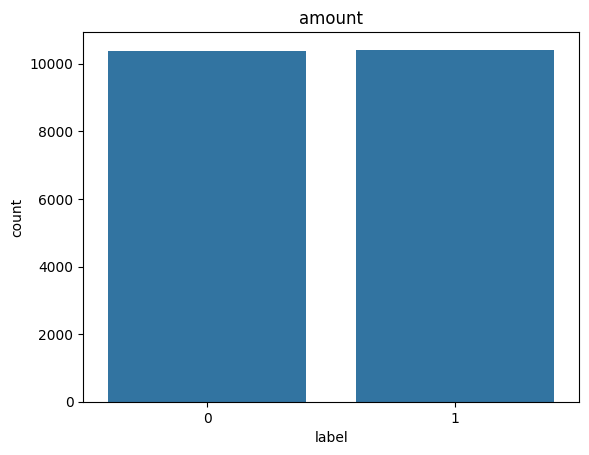

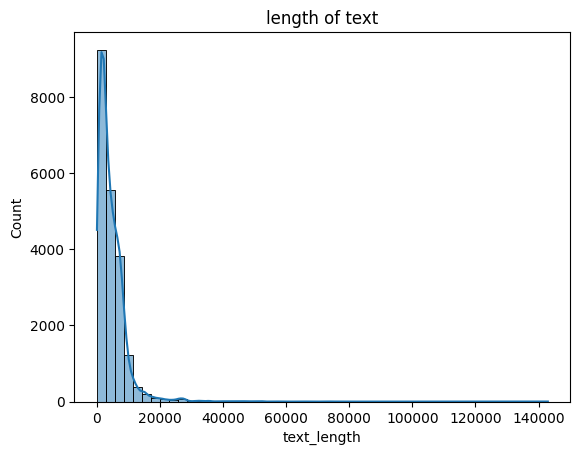

In [8]:
sns.countplot(x='label', data=data)
plt.title('amount')
plt.show()

data['text_length'] = data['text'].apply(len)
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title('length of text')
plt.show()


stemming


In [9]:
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [10]:
data['text'] = data['text'].apply(stemming)


In [11]:
data['text']

,text
0,hous dem aid even see comey letter jason chaff...
1,ever get feel life circl roundabout rather hea...
2,truth might get fire octob tension intellig an...
3,video civilian kill singl us airstrik identifi...
4,print iranian woman sentenc six year prison ir...
...,...
20795,rapper unload black celebr met donald trump el...
20796,green bay packer lost washington redskin week ...
20797,maci today grew union sever great name america...
20798,nato russia hold parallel exercis balkan press...


In [13]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['text']).toarray()
Y= data['label']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

In [20]:
x_train.shape

(16640, 5000)

In [21]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

Test


In [27]:
y_predict=model.predict(x_test)
print(f"Accuracy score: {accuracy_score(y_test,y_predict)}")
print(classification_report(y_test,y_predict))

Accuracy score: 0.9439903846153846
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2074
           1       0.93      0.96      0.94      2086

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160

